Topic 5.1  |  三维散点
# Gaussian多元分布概率密度
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

### 自定义马哈距离、高斯分布密度函数

In [4]:
def Mahal_d_2_pdf(d,Sigma):
    # 将马氏距离转化为概率密度
    
    scale_1 = np.sqrt(np.linalg.det(Sigma))
    scale_2 = (2*np.pi)**(3/2)
    pdf = np.exp(-d**2/2)/scale_1/scale_2
    
    return pdf

def Mahal_d(Mu, Sigma, x):
    # 计算马哈距离
  
    x_demeaned = x - Mu
    inv_covmat = np.linalg.inv(Sigma)
    left = np.dot(x_demeaned, inv_covmat)
    mahal = np.dot(left, x_demeaned.T)
    return np.sqrt(mahal).diagonal()

### 产生网格数据、概率密度

In [10]:
x1 = np.linspace(-2,2,31)
x2 = np.linspace(-2,2,31)
x3 = np.linspace(-2,2,31)

xxx1,xxx2,xxx3 = np.meshgrid(x1,x2,x3)

Mu = np.array([[0, 0, 0]])

Sigma = np.array([[1, 0.6, -0.4],
                  [0.6, 1.5, 1],
                  [-0.4, 1, 2]])

x_array = np.vstack([xxx1.ravel(),xxx2.ravel(), xxx3.ravel()]).T

# 首先计算马氏距离
d_array = Mahal_d(Mu, Sigma, x_array)
d_array = d_array.reshape(xxx1.shape)

# 将马氏距离转化成概率密度PDF
pdf_zz = Mahal_d_2_pdf(d_array, Sigma)

C:\Users\james\AppData\Local\Temp\ipykernel_3124\1515805893.py:17: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(mahal).diagonal()


In [11]:
xmin, xmax = xxx1.min(), xxx1.max()
ymin, ymax = xxx2.min(), xxx2.max()
zmin, zmax = xxx3.min(), xxx3.max()

normalize = mpl.colors.Normalize(vmin=0, vmax=0.1)

### 沿x3

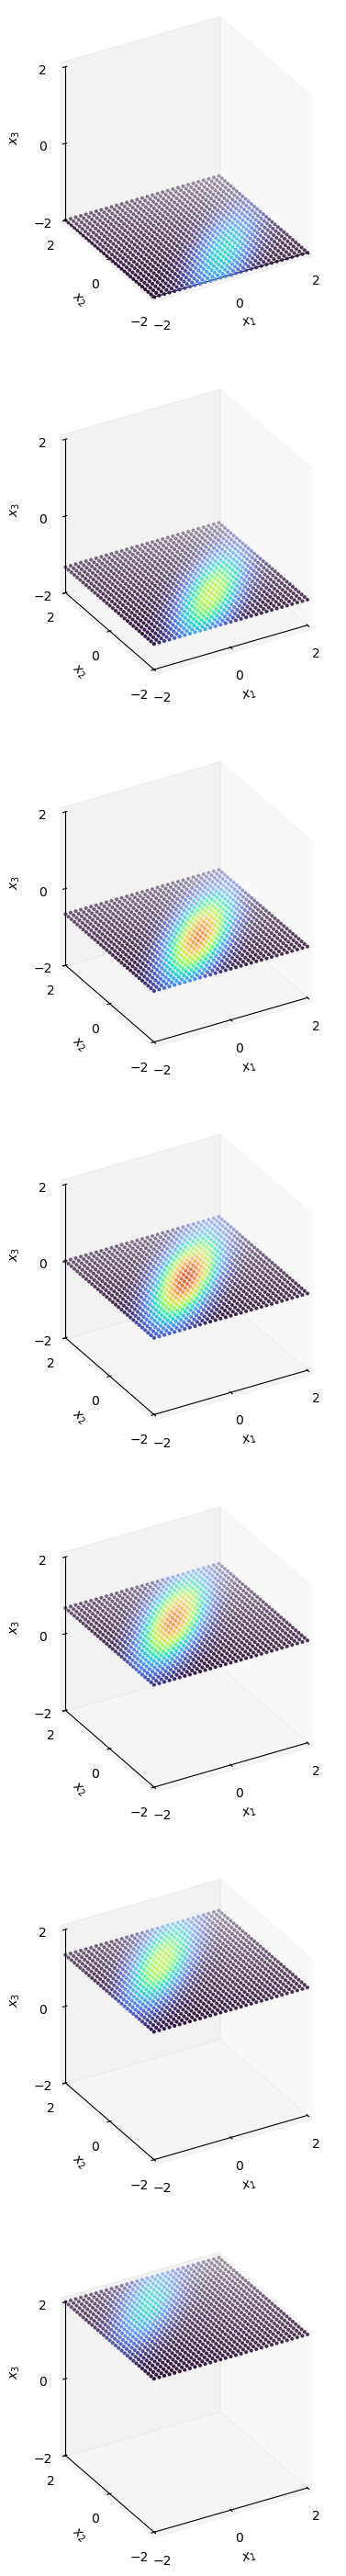

In [16]:
fig = plt.figure(figsize=(6, 36))

for fig_idx,x3_slice_idx in enumerate(np.arange(0,len(x3),5)):
    
    ax = fig.add_subplot(len(np.arange(0,len(x3),5)), 1, fig_idx + 1, projection='3d')

    ax.scatter(xxx1[:, :, x3_slice_idx].ravel(), 
               xxx2[:, :, x3_slice_idx].ravel(), 
               xxx3[:, :, x3_slice_idx].ravel(), 
               c=pdf_zz[:, :, x3_slice_idx].ravel(), 
               cmap='turbo', 
               norm=normalize, s=4)

    ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])
    ax.set_xticks([-2,0,2])
    ax.set_yticks([-2,0,2])
    ax.set_zticks([-2,0,2])
    ax.view_init(azim=-120, elev=30) 
    ax.set_proj_type('ortho')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$x_3$')
    ax.set_box_aspect((1, 1, 1))
    ax.grid(False)

fig.savefig('Figures/高斯分布_along_x3.svg', format='svg')

In [ ]:
### 沿x2

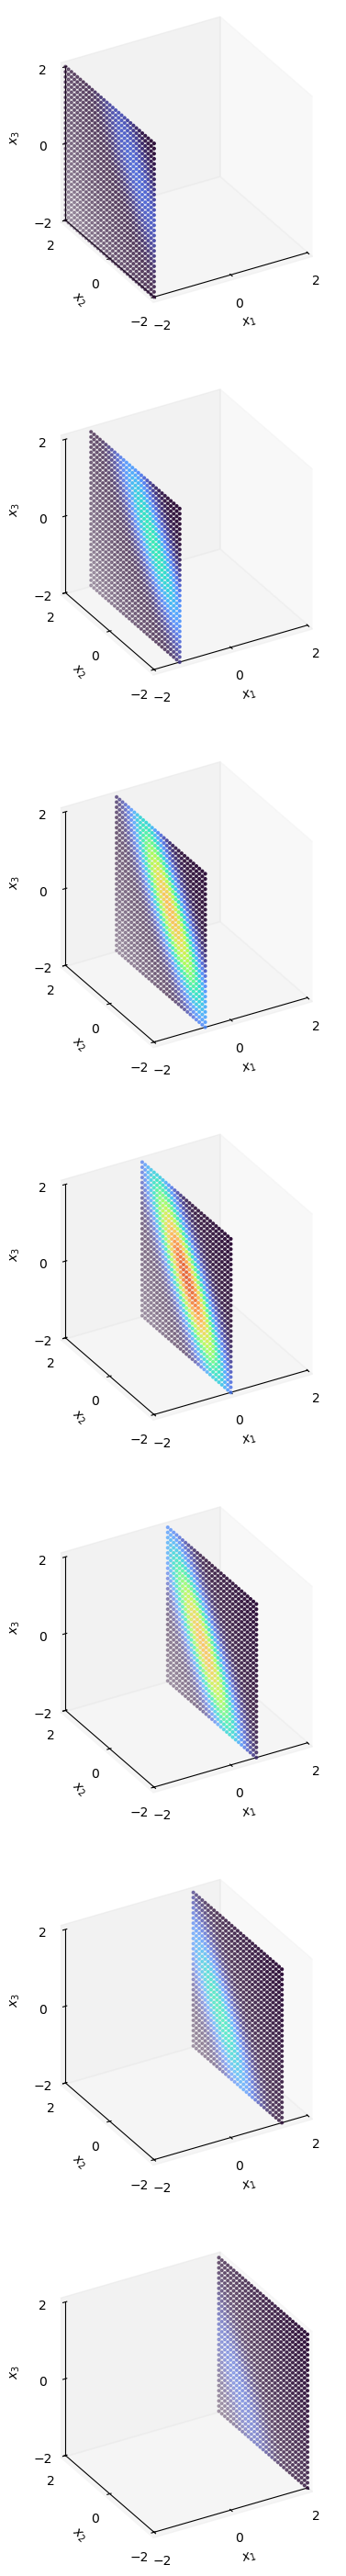

In [17]:
fig = plt.figure(figsize=(6, 36))

for fig_idx,x2_slice_idx in enumerate(np.arange(0,len(x2),5)):
    
    ax = fig.add_subplot(len(np.arange(0,len(x2),5)), 1, fig_idx + 1, projection='3d')

    ax.scatter(xxx1[:, x2_slice_idx, :].ravel(), 
               xxx2[:, x2_slice_idx, :].ravel(), 
               xxx3[:, x2_slice_idx, :].ravel(), 
               c=pdf_zz[:, x2_slice_idx, :].ravel(), 
               cmap='turbo', 
               norm=normalize, s=4)

    ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])
    ax.set_xticks([-2,0,2])
    ax.set_yticks([-2,0,2])
    ax.set_zticks([-2,0,2])
    ax.view_init(azim=-120, elev=30) 
    ax.set_proj_type('ortho')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$x_3$')
    ax.set_box_aspect((1, 1, 1))
    ax.grid(False)

fig.savefig('Figures/高斯分布_along_x2.svg', format='svg')

In [ ]:
### 沿x1

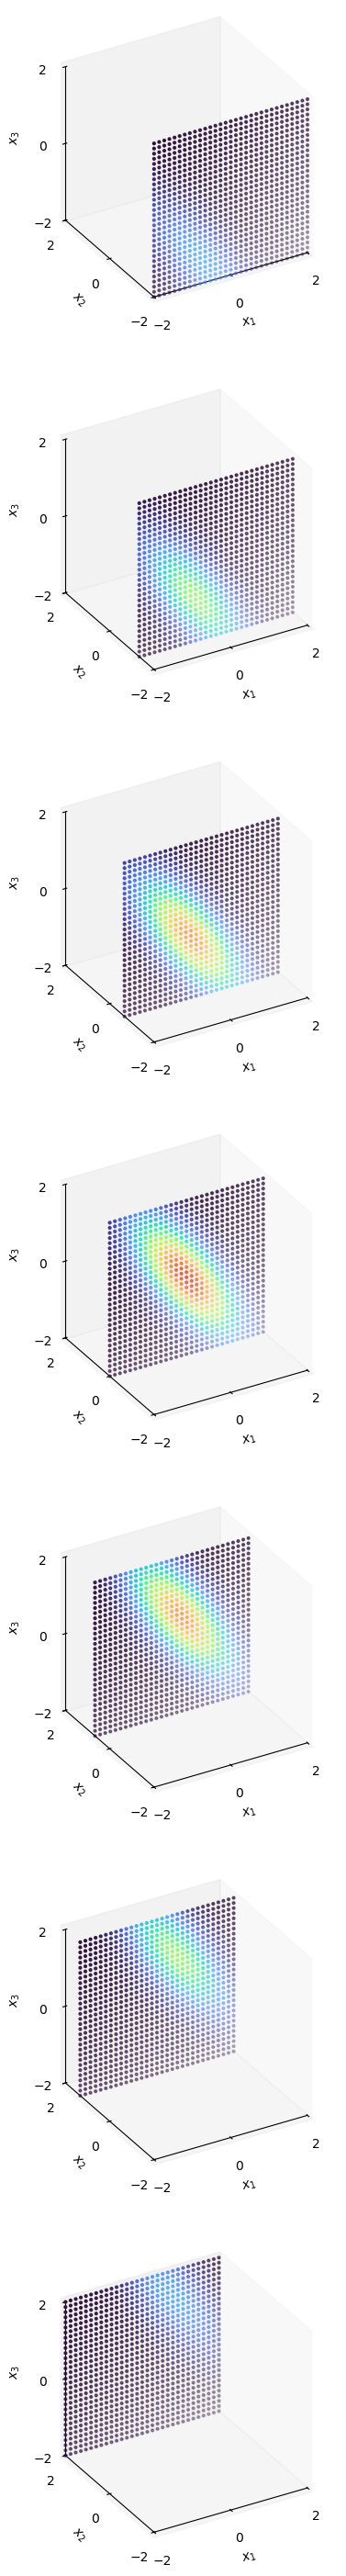

In [18]:
fig = plt.figure(figsize=(6, 36))

for fig_idx,x1_slice_idx in enumerate(np.arange(0,len(x1),5)):
    
    ax = fig.add_subplot(len(np.arange(0,len(x2),5)), 1, fig_idx + 1, projection='3d')

    ax.scatter(xxx1[x1_slice_idx, :, :].ravel(), 
               xxx2[x1_slice_idx, :, :].ravel(), 
               xxx3[x1_slice_idx, :, :].ravel(), 
               c=pdf_zz[x1_slice_idx, :, :].ravel(), 
               cmap='turbo', 
               norm=normalize, s=4)

    ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])
    ax.set_xticks([-2,0,2])
    ax.set_yticks([-2,0,2])
    ax.set_zticks([-2,0,2])
    ax.view_init(azim=-120, elev=30) 
    ax.set_proj_type('ortho')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$x_3$')
    ax.set_box_aspect((1, 1, 1))
    ax.grid(False)

fig.savefig('Figures/高斯分布_along_x1.svg', format='svg')